# <center>Malignant Comment Classification</center>


### Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


IMPORT LIBRARIES AND LOAD DATASET

In [1]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('cmt_train.csv')
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df1=pd.read_csv('cmt_test.csv')
df1.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
df.shape , df1.shape

((159571, 8), (153164, 2))

IN traning set we have 159571 rows or comment and 8 variables while in testing set we have 153164 comment and 2 rows only so we need to find out best from comment

In [6]:
df.info()

#2 columns is objective(id and comment_text) and other is int form of 0 or 1 where 0 is not toxic and 1 means malignant.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
df.describe()

# as per mean it looking skewed data 

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df1.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [10]:
df.isnull().sum()

# there is no null values in dataset

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
df1.isnull().sum()

id              0
comment_text    0
dtype: int64

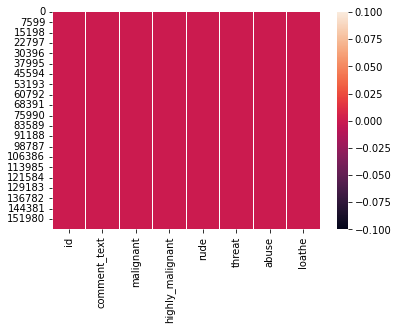

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.corr()

#our aim is to find out malignant or not and we can see that 2 columns "rude" and 'abuse' have higher co-relation with malignant.


,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


malignant


0    144277
1     15294
Name: malignant, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


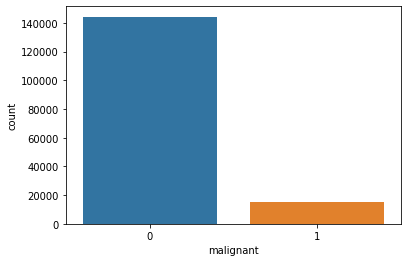

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


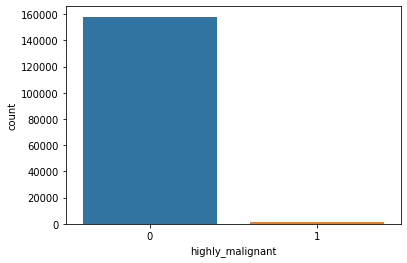

loathe


0    158166
1      1405
Name: loathe, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


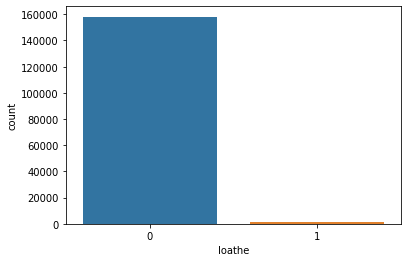

rude


0    151122
1      8449
Name: rude, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


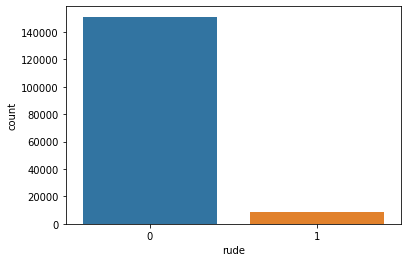

abuse


0    151694
1      7877
Name: abuse, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


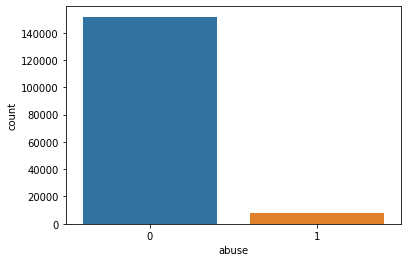

threat


0    159093
1       478
Name: threat, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


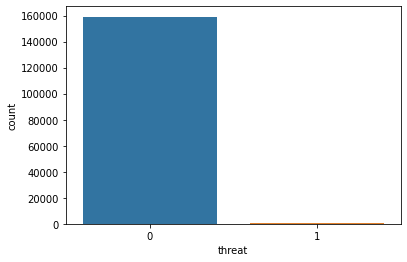

In [14]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()


#we will count no of variable in all columns so we can understand data.

CONCLUSION:

1) 144277 comments are normal while 15294 are malignant.

2) 157976 comments are normal while 1595 comments are highly malignant. it means from 15294 malignant comments 1595 are highly malignant.

3) 158166 comments are not loathe and 1405 commments are loathe.

4) 8449 comments have rude words which leads to malignant chances higher.

5) 7877 comments have 7877 abuse words and this have highest chances of malignant catagory.

6) 478 comments have threated.

7) rude and abuse have higher chances of malignant.


We can see that in comments there are not much clearity like use of smiley, short keywords, words, symbols so we will first clear it and make comments ready for analysis.

once we clear the comments then we will check that in malignant comments which type of words are mostly used and that words we will take as maligannt identifier and based on it we will make our model

In [15]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
df['length'] = df['comment_text'].str.len()
df.head(2)

# add columnd of length of string

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [17]:
# Convert all messages to lower case
df['comment_text'] = df['comment_text'].str.lower()

# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


In [18]:
df['clean_length'] = df.comment_text.str.len()
df.head()

# here we can see that after cleaning length of columns quite short. we can see difference of length and clean_length

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [19]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


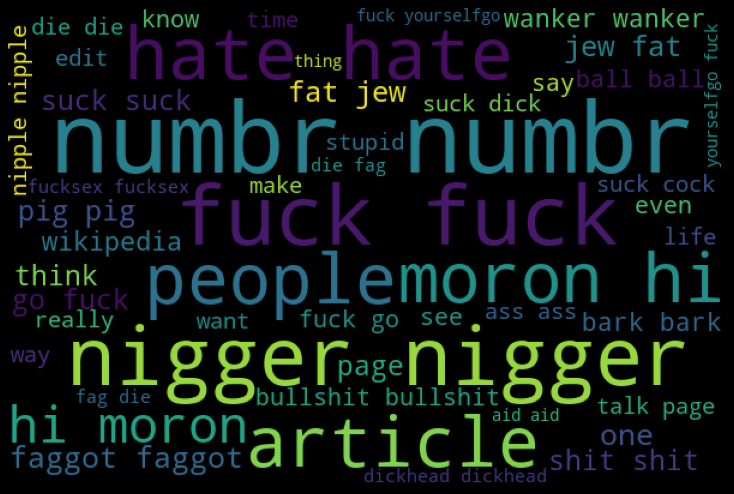

In [20]:

#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
hams

6                               cocksucker piss around work
12        hey... it.. talk it... exclusive group wp tali...
16              bye! look, come think comming back! tosser.
42        gay antisemmitian? archangel white tiger meow!...
43                             fuck filthy mother ass, dry!
                                ...                        
159494    previous conversation fucking shit eating libe...
159514                              mischievious pubic hair
159541    absurd edits absurd edits great white shark to...
159546    hey listen ever!!!! delete edits ever i'm anno...
159554    i'm going keep posting stuff deleted fucking s...
Name: comment_text, Length: 15294, dtype: object

Now we have clear data where we have some words which are present in malignant comments of training dataset. we will use and treat this data as input and build a model where it predict that comments is malignant or not?

In [22]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

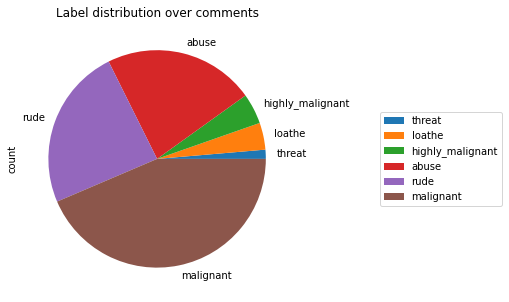

In [23]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

45% comments are maligant while 20% are rude, 18% near is abuse and rest of all are loathe and threat 

In [24]:

target_data = df[cols_target]

df['bad'] =df[cols_target].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [26]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])
x = features

In [27]:
df.shape

(159571, 11)

In [28]:
df.shape

(159571, 11)

In [29]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,bad
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180,0
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111,0
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149,0
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397,0
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47,0
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::and second time asking, view completely ...",0,0,0,0,0,0,295,211,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page. numbr.numbr,0,0,0,0,0,0,99,49,0
159568,ffee36eab5c267c9,"spitzer umm, there actual article prostitution...",0,0,0,0,0,0,81,68,0
159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0,116,60,0


In [30]:
y=df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [31]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [43]:
lg = LogisticRegression(C=1, max_iter = 3000)
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()


In [33]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Score',f.score(x_train,y_train))
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [34]:
fun(lg)

Score 0.9595341050501796
Accuracy Score 95.53183489304813
Confusion Matrix
 [[42729   221]
 [ 1918  3004]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872

F1 score 73.7449367865472


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LOGISTIC REGRESSION:
    
    We are getting 95.53% accuracy in testing dataset which is very good and we have good F1 score also.

In [35]:
fun(rndf)
pred=rndf.predict(x_test)

Score 0.9988540631518635
Accuracy Score 95.47125668449198
Confusion Matrix
 [[42393   557]
 [ 1611  3311]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872

F1 score 75.33560864618887


In [36]:
fun(dtc)

Score 0.9988898736783678
Accuracy Score 93.97977941176471
Confusion Matrix
 [[41603  1347]
 [ 1535  3387]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872

F1 score 70.1532725766363


In [38]:
fun(knn)

Score 0.9296681259456218
Accuracy Score 91.84909759358288
Confusion Matrix
 [[42615   335]
 [ 3567  1355]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     42950
           1       0.80      0.28      0.41      4922

    accuracy                           0.92     47872
   macro avg       0.86      0.63      0.68     47872
weighted avg       0.91      0.92      0.90     47872

F1 score 40.986085904416214


In [39]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()


In [40]:
fun(ad)
pred=ad.predict(x_test)

Score 0.9463737365598618
Accuracy Score 94.54169451871658
Confusion Matrix
 [[42587   363]
 [ 2250  2672]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.54      0.67      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.77      0.82     47872
weighted avg       0.94      0.95      0.94     47872

F1 score 67.16099032298605


In [41]:
fun(gd)
pred=gd.predict(x_test)

Score 0.9421391418007323
Accuracy Score 93.90040106951871
Confusion Matrix
 [[42812   138]
 [ 2782  2140]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     42950
           1       0.94      0.43      0.59      4922

    accuracy                           0.94     47872
   macro avg       0.94      0.72      0.78     47872
weighted avg       0.94      0.94      0.93     47872

F1 score 59.44444444444444


In [46]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988540631518635
Test accuracy is 0.9548587901069518
cross validation score : 95.65835827444609
[[42396   554]
 [ 1607  3315]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



In [49]:
estimator=[]

estimator.append(('lg',LogisticRegression()))
estimator.append(('RF',RandomForestClassifier()))


In [50]:
y_pred_prob=RF.predict_proba(x_test)[:,1]
y_pred_prob

array([0.01, 1.  , 0.  , ..., 0.  , 0.02, 0.01])

#### AUC-ROC CURVE

In [51]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.7157847851394442


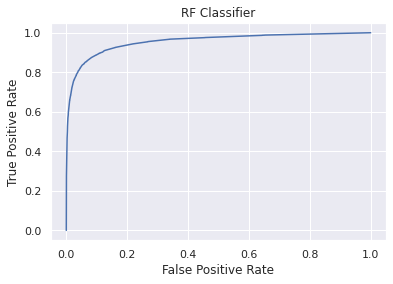

In [52]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Classifier')
plt.show()

In [53]:
import pickle
filename='Malignant_comment.pkl'
pickle.dump(RF,open(filename,'wb'))

        Actual  Predict
107646       0        0
46055        1        1
121458       0        0
52011        1        1
52488        0        0
...        ...      ...
55937        0        0
38660        0        0
68031        0        0
113412       0        0
34609        0        0

[47872 rows x 2 columns]


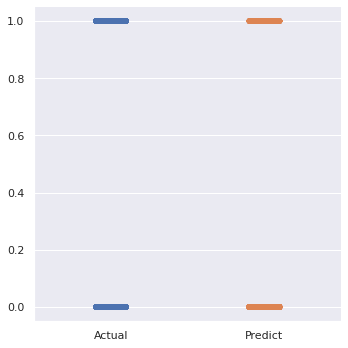

In [54]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=RF.predict(x_test)
print(res)
sns.catplot(data=res)